# pull_weights

In [6]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from IPython.display import display, HTML # used to print out pretty pandas dataframes
import matplotlib.dates as dates
import matplotlib.lines as mlines

%matplotlib inline
plt.style.use('ggplot') 

# specify user/password/where the database is
sqluser = 'postgres'
sqlpass = 'postgres'
dbname = 'mimic'
schema_name = 'mimiciii'
host = 'localhost'

query_schema = 'SET search_path to ' + schema_name + ';'

# connect to the database
con = psycopg2.connect(dbname=dbname, user=sqluser, password=sqlpass, host=host)

In [70]:
# load the daily weight from the chartevents
# unique_item = '226531' #lb
unique_item = '226512' #kg
query = query_schema + """
SELECT 
    subject_id ,
    hadm_id,
    icustay_id,
    itemid,
    valuenum,
    valueuom
from chartevents
WHERE
    ITEMID = '{}'
ORDER BY
    valuenum DESC
""".format(unique_item)
print('my query:')
print(query)
df = pd.read_sql_query(query,con)
print(df.head())

my query:
SET search_path to mimiciii;
SELECT 
    subject_id ,
    hadm_id,
    icustay_id,
    itemid,
    valuenum,
    valueuom
from chartevents
WHERE
    ITEMID = '226512'
ORDER BY
    valuenum DESC

   subject_id  hadm_id  icustay_id  itemid  valuenum valueuom
0       97830   112817    264867.0  226512    1251.0       kg
1       84039   150314    274467.0  226512     710.4       kg
2       82004   144594    287511.0  226512     710.0       kg
3       97917   118576    220449.0  226512     670.0       kg
4       42683   192931    267149.0  226512     575.0       kg


mean = 81.05444700053089


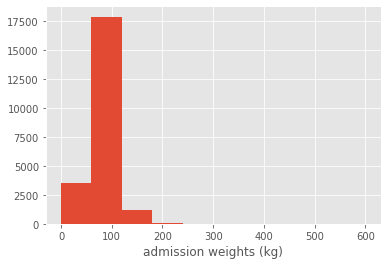

In [71]:
plt.hist(df['valuenum'], range = [0,600])
plt.xlabel("admission weights (kg)")
print('mean = {}'.format(np.mean(df['valuenum'])))

# get eicu weights

In [72]:
edat = pd.read_csv('/Users/grovesdixon/projects/Insight/icu_project/eicu-collaborative-research-database-2.0/patient.csv.gz')
edat.head()



,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,...,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
0,141168,128919,Female,70,Caucasian,59,91,"Rhythm disturbance (atrial, supraventricular)",152.4,15:54:00,...,Direct Admit,1,admit,84.3,85.8,03:50:00,3596,Death,Expired,002-34851
1,141178,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,...,Emergency Department,1,admit,54.4,54.4,09:18:00,8,Step-Down Unit (SDU),Alive,002-33870
2,141179,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,...,ICU to SDU,2,stepdown/other,NaN,60.4,19:20:00,2042,Home,Alive,002-33870
3,141194,128941,Male,68,Caucasian,73,92,"Sepsis, renal/UTI (including bladder)",180.3,18:18:40,...,Floor,1,admit,73.9,76.7,15:31:00,4813,Floor,Alive,002-5276
4,141196,128943,Male,71,Caucasian,67,109,NaN,162.6,20:21:00,...,ICU to SDU,2,stepdown/other,NaN,63.2,22:23:00,1463,Floor,Alive,002-37665


mean = 83.93392025675978


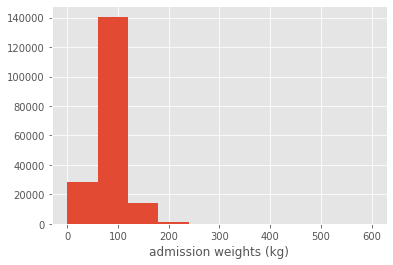

In [73]:
w = edat.loc[edat['admissionweight'].notna()]
len(w)
plt.hist(w['admissionweight'], range = [0,600])
plt.xlabel("admission weights (kg)")
print('mean = {}'.format(np.mean(edat['admissionweight'])))

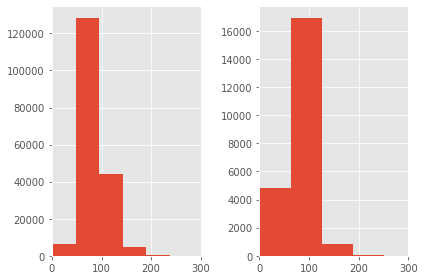

In [87]:
#plot together
fig, axs = plt.subplots(1, 2, sharey=False, sharex=True, tight_layout=True)
n_bins = 20
plt.xlim([0,300])
axs[0].hist(w['admissionweight'], bins=n_bins)
axs[1].hist(df['valuenum'], bins=n_bins);